##### Download MNIST images of handwritten digits

In [1]:
import sys
sys.path.append('../..')  # to go to the main folder of the whole project

# Define the model name
NAME = 'pca'

# Download data
from src.data.mnist.load_mnist_data import load_mnist_data
(x_train, y_train), (x_test, y_test) = load_mnist_data()

x_train_flat = x_train.reshape(x_train.shape[0], 28*28)
x_test_flat = x_test.reshape(x_test.shape[0], 28*28)

##### Plot several true images from MNIST dataset

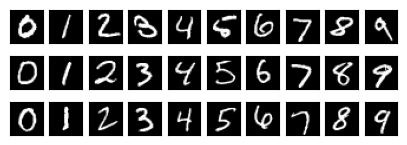

In [2]:
from src.visualization.mnist.plot_true_images import plot_true_images
plot_true_images(N=3,
                 x=x_test,
                 y=y_test)

##### Train PCA model

In [3]:
# calculate the first three PCs (Eigenvectors & Eigenvalues of the covariance matrix)
from sklearn.decomposition import PCA
import pandas as pd

pca_model = PCA(n_components=2, copy=True, whiten=False)
pca_model.model_type = 'pca'

pca_model.fit(x_train_flat)

PCA(n_components=2)

##### How much of the variance are explained by first 2 components?

In [4]:
for i, pc in enumerate(pca_model.explained_variance_ratio_):
    print('PC {0}:\t{1:5.2f}%'.format(i+1, pc*100.0))

PC 1:	 9.70%
PC 2:	 7.10%


##### Plot true vs prediction images

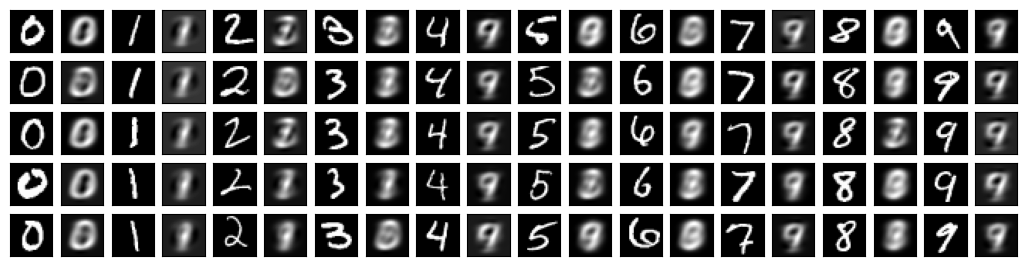

In [5]:
from src.visualization.mnist.plot_true_vs_prediction_images import plot_true_vs_prediction_images
plot_true_vs_prediction_images(pca_model,
                               x_test_flat,
                               y_test,
                               save_name=NAME)

##### Plot 2d latent space values

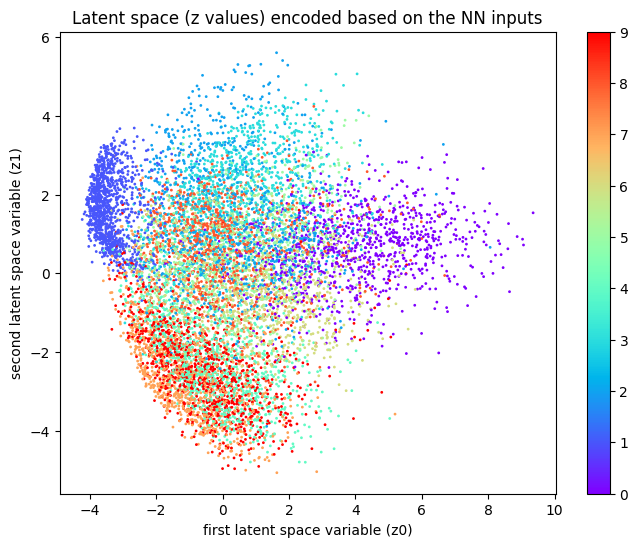

In [6]:
from src.visualization.plot_latent_space_2d_values import plot_latent_space_2d_values
plot_latent_space_2d_values(pca_model, 
                            x_test_flat, 
                            y_test,
                            save_name=NAME,
                            data_type='mnist')

##### Predictions from latent space

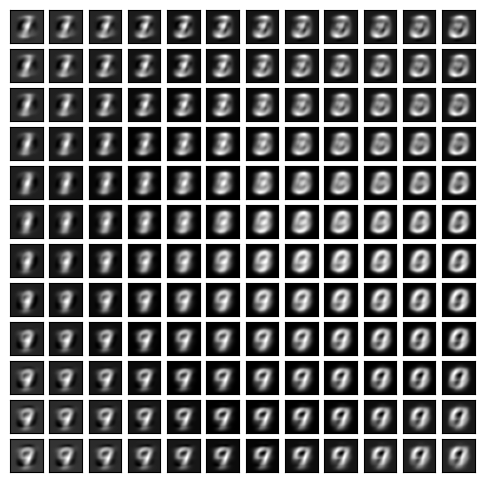

In [8]:
from src.visualization.mnist.plot_predictions_from_2d_latent_space import plot_predictions_from_2d_latent_space
plot_predictions_from_2d_latent_space(pca_model,
                                      n_cols=12,
                                      xmin=-3,
                                      xmax=3,
                                      ymin=-3,
                                      ymax=3,
                                      save_name=NAME
                                      )